In [56]:
import boto3
from configparser import ConfigParser
import requests
from IPython.display import display, HTML
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

In [22]:
# load keys
keys = ConfigParser()
keys.read('../keys.secret')
print(f"loaded keys for: {keys.sections()}")

loaded keys for: ['amazon', 'amazon_katie', 'nsw_opendata', 'mapbox']


In [26]:
rekognition = boto3.client("rekognition", keys["amazon"]["region"])

In [54]:
with open("data/summit_post_urls_selected.txt", "r") as f:
    image_links = f.read().strip().split("\n")
    
image_links[:5]

['https://80d2853cc4def76b377d-54344bc01a8b066c84096a8e7a3499ac.ssl.cf1.rackcdn.com/original/434140.jpg',
 'https://80d2853cc4def76b377d-54344bc01a8b066c84096a8e7a3499ac.ssl.cf1.rackcdn.com/original/434502.jpg',
 'https://80d2853cc4def76b377d-54344bc01a8b066c84096a8e7a3499ac.ssl.cf1.rackcdn.com/original/434922.jpg',
 'https://80d2853cc4def76b377d-54344bc01a8b066c84096a8e7a3499ac.ssl.cf1.rackcdn.com/original/434947.jpg',
 'https://80d2853cc4def76b377d-54344bc01a8b066c84096a8e7a3499ac.ssl.cf1.rackcdn.com/original/480835.jpg']

In [64]:
r = requests.get(image_links[11])
rr = rekognition.detect_labels(Image={"Bytes": r.content})
rr

{'Labels': [{'Name': 'Rock', 'Confidence': 70.87091827392578},
  {'Name': 'Outdoors', 'Confidence': 67.1398696899414},
  {'Name': 'Snow', 'Confidence': 67.1398696899414},
  {'Name': 'Mountain', 'Confidence': 62.174232482910156},
  {'Name': 'Nature', 'Confidence': 62.174232482910156},
  {'Name': 'Adventure', 'Confidence': 51.27058029174805},
  {'Name': 'Leisure Activities', 'Confidence': 51.27058029174805},
  {'Name': 'Cap', 'Confidence': 50.66568374633789},
  {'Name': 'Clothing', 'Confidence': 50.66568374633789},
  {'Name': 'Hat', 'Confidence': 50.66568374633789}],
 'ResponseMetadata': {'RequestId': 'dcd00500-b18f-11e8-b73a-5d1f565d7fb5',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 06 Sep 2018 04:46:48 GMT',
   'x-amzn-requestid': 'dcd00500-b18f-11e8-b73a-5d1f565d7fb5',
   'content-length': '513',
   'connection': 'keep-alive'},
  'RetryAttempts': 0}}

ValueError: invalid PNG header

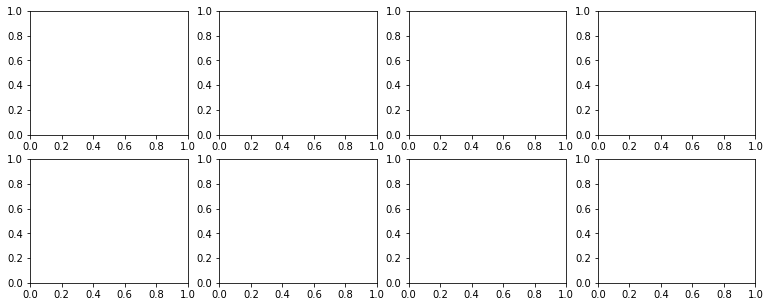

In [61]:
def plot_images(links=image_links[:8], labels=None, rows=2):
        
    cols = int(np.ceil((len(links)/rows)))
    fig, axes = plt.subplots(2,cols, figsize=(13,5))
    
    for ax, url in zip(axes.flat, links):
        img = plt.imread(url)
        ax.imshow(img)
        ax.set_title(label_names[np.argmax(label)])
        ax.axis('off')
    plt.show()
        
plot_images(image_links[10:18])

In [63]:
r = requests.get(image_links[11])
rr = rekognition.detect_labels(Image={"Bytes": r.content})
rr

{'Labels': [{'Name': 'Rock', 'Confidence': 70.87091827392578},
  {'Name': 'Outdoors', 'Confidence': 67.1398696899414},
  {'Name': 'Snow', 'Confidence': 67.1398696899414},
  {'Name': 'Mountain', 'Confidence': 62.174232482910156},
  {'Name': 'Nature', 'Confidence': 62.174232482910156},
  {'Name': 'Adventure', 'Confidence': 51.27058029174805},
  {'Name': 'Leisure Activities', 'Confidence': 51.27058029174805},
  {'Name': 'Cap', 'Confidence': 50.66568374633789},
  {'Name': 'Clothing', 'Confidence': 50.66568374633789},
  {'Name': 'Hat', 'Confidence': 50.66568374633789}],
 'ResponseMetadata': {'RequestId': 'c8d7de29-b18f-11e8-b73a-5d1f565d7fb5',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 06 Sep 2018 04:46:14 GMT',
   'x-amzn-requestid': 'c8d7de29-b18f-11e8-b73a-5d1f565d7fb5',
   'content-length': '513',
   'connection': 'keep-alive'},
  'RetryAttempts': 0}}

In [62]:
response = requests.get(image_links[10])
response_content = response.content
rekognition_response = rekognition.detect_faces(Image={'Bytes': response_content}, Attributes=['ALL'])
                           
print(rekognition_response)

{'FaceDetails': [{'BoundingBox': {'Width': 0.04510921239852905, 'Height': 0.06014561653137207, 'Left': 0.4724596440792084, 'Top': 0.31972143054008484}, 'AgeRange': {'Low': 48, 'High': 68}, 'Smile': {'Value': True, 'Confidence': 89.26968383789062}, 'Eyeglasses': {'Value': False, 'Confidence': 99.86251831054688}, 'Sunglasses': {'Value': False, 'Confidence': 99.91633605957031}, 'Gender': {'Value': 'Female', 'Confidence': 99.17916870117188}, 'Beard': {'Value': False, 'Confidence': 99.13652801513672}, 'Mustache': {'Value': False, 'Confidence': 99.78054809570312}, 'EyesOpen': {'Value': True, 'Confidence': 79.03730773925781}, 'MouthOpen': {'Value': False, 'Confidence': 99.96849060058594}, 'Emotions': [{'Type': 'HAPPY', 'Confidence': 91.36492156982422}, {'Type': 'SAD', 'Confidence': 1.762455701828003}, {'Type': 'CALM', 'Confidence': 0.7078230381011963}], 'Landmarks': [{'Type': 'eyeLeft', 'X': 0.49013519287109375, 'Y': 0.3416643440723419}, {'Type': 'eyeRight', 'X': 0.5056005120277405, 'Y': 0.34

In [65]:
rekognition_response.keys()

dict_keys(['FaceDetails', 'ResponseMetadata'])

In [66]:
rekognition_response["FaceDetails"]

[{'BoundingBox': {'Width': 0.04510921239852905,
   'Height': 0.06014561653137207,
   'Left': 0.4724596440792084,
   'Top': 0.31972143054008484},
  'AgeRange': {'Low': 48, 'High': 68},
  'Smile': {'Value': True, 'Confidence': 89.26968383789062},
  'Eyeglasses': {'Value': False, 'Confidence': 99.86251831054688},
  'Sunglasses': {'Value': False, 'Confidence': 99.91633605957031},
  'Gender': {'Value': 'Female', 'Confidence': 99.17916870117188},
  'Beard': {'Value': False, 'Confidence': 99.13652801513672},
  'Mustache': {'Value': False, 'Confidence': 99.78054809570312},
  'EyesOpen': {'Value': True, 'Confidence': 79.03730773925781},
  'MouthOpen': {'Value': False, 'Confidence': 99.96849060058594},
  'Emotions': [{'Type': 'HAPPY', 'Confidence': 91.36492156982422},
   {'Type': 'SAD', 'Confidence': 1.762455701828003},
   {'Type': 'CALM', 'Confidence': 0.7078230381011963}],
  'Landmarks': [{'Type': 'eyeLeft',
    'X': 0.49013519287109375,
    'Y': 0.3416643440723419},
   {'Type': 'eyeRight', 'X